In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
from datetime import datetime
import networkx as nx

In [4]:
trips = pd.read_csv('yellow_tripdata_2016-05.csv')
trips = trips[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

In [5]:
# Filter trips: only consider trips with 0 < distance < 100
trips = trips.loc[(trips['trip_distance'] > 0.0) & (trips['trip_distance'] < 100.0), :]

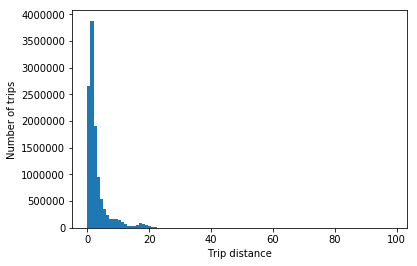

In [6]:
fig, ax = plt.subplots()
ax.hist(trips['trip_distance'], 100)
ax.set_xlabel('Trip distance')
ax.set_ylabel('Number of trips')
plt.show()

In [7]:
# Function to calculate distance between drop off points of 2 trips
def distanceTwoDPO(trip1, trip2):
    pku_long_rad = trip1.dropoff_longitude*np.pi/180
    pku_lat_rad = trip1.dropoff_latitude*np.pi/180
    dpo_long_rad = trip2.dropoff_longitude*np.pi/180
    dpo_lat_rad = trip2.dropoff_latitude*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((pku_lat_rad-dpo_lat_rad)/2)*np.sin((pku_lat_rad-dpo_lat_rad)/2)+np.cos(pku_lat_rad)*np.cos(dpo_lat_rad)*np.sin((pku_long_rad-dpo_long_rad)/2)*np.sin((pku_long_rad-dpo_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return dmile

In [8]:
# Function to calculate Euclidean distance from pickup point to dropoff point of 1 trip
def distance(df):
    pku_long_rad = df['pickup_longitude']*np.pi/180
    pku_lat_rad = df['pickup_latitude']*np.pi/180
    dpo_long_rad = df['dropoff_longitude']*np.pi/180
    dpo_lat_rad = df['dropoff_latitude']*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((pku_lat_rad-dpo_lat_rad)/2)*np.sin((pku_lat_rad-dpo_lat_rad)/2)+np.cos(pku_lat_rad)*np.cos(dpo_lat_rad)*np.sin((pku_long_rad-dpo_long_rad)/2)*np.sin((pku_long_rad-dpo_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return df.assign(distance=dmile)

In [9]:
# Create new column in DataFrame named distance
trips = trips.pipe(distance)

In [10]:
# Only consider trips with Euclidean distance in range (0, 100)
trips = trips.loc[(trips['distance'] > 0.0) & (trips['distance'] < 100.0), :]

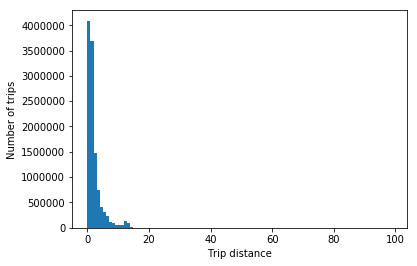

In [11]:
fig, ax = plt.subplots()
ax.hist(trips['distance'], 100)
ax.set_xlabel('Trip distance')
ax.set_ylabel('Number of trips')
plt.show()

In [12]:
# Calculate distance ratio = trip distance / Euclidean distance
trips['distance_ratio'] = trips['trip_distance']/trips['distance']

In [13]:
# Only consider trips with distance ratio in range (0, 100)
trips = trips.loc[(trips['distance_ratio'] > 0.0) & (trips['distance_ratio'] < 100.0), :]

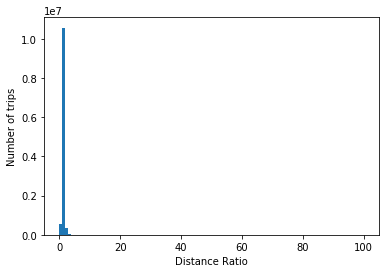

In [14]:
fig, ax = plt.subplots()
ax.hist(trips['distance_ratio'], 100)
ax.set_xlabel('Distance Ratio')
ax.set_ylabel('Number of trips')
plt.show()

In [15]:
trips['distance_ratio'].mean()

1.4252320749239542

In [16]:
# Convert pickup and dropoff datetime to datetime type
trips['pku_time'] = pd.to_datetime(trips['tpep_pickup_datetime'], infer_datetime_format=True)
trips['dpo_time'] = pd.to_datetime(trips['tpep_dropoff_datetime'], infer_datetime_format=True)

In [17]:
trips = trips[['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance', 'distance_ratio', 'pku_time', 'dpo_time']]
trips

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,distance_ratio,pku_time,dpo_time
0,3.60,-73.985901,40.768040,-73.983986,40.730099,2.619841,1.374129,2016-05-01 00:00:00,2016-05-01 00:17:31
1,1.68,-73.991577,40.744751,-73.975700,40.765469,1.652925,1.016380,2016-05-01 00:00:00,2016-05-01 00:07:31
2,1.09,-73.993073,40.741573,-73.980995,40.744633,0.665727,1.637308,2016-05-01 00:00:00,2016-05-01 00:07:01
3,4.21,-73.991943,40.684601,-74.002258,40.733002,3.382959,1.244473,2016-05-01 00:00:00,2016-05-01 00:19:47
4,0.56,-74.005280,40.740192,-73.997498,40.737564,0.445437,1.257191,2016-05-01 00:00:00,2016-05-01 00:06:39
5,0.63,-73.979294,40.755764,-73.988014,40.758469,0.492509,1.279164,2016-05-01 00:00:00,2016-05-01 00:05:19
6,6.68,-73.981544,40.780739,-73.937805,40.855343,5.631629,1.186158,2016-05-01 00:00:00,2016-05-01 00:15:43
7,1.48,-73.987198,40.750507,-73.980797,40.767826,1.240939,1.192645,2016-05-01 00:00:00,2016-05-01 00:06:31
8,1.59,-74.001610,40.740990,-73.981079,40.730675,1.287932,1.234538,2016-05-01 00:00:00,2016-05-01 00:00:00
9,3.52,-74.013855,40.714119,-73.994049,40.761452,3.426183,1.027383,2016-05-01 00:00:00,2016-05-01 00:00:00


In [18]:
# Only consider trip with dropoff time > pickup time
trips = trips.loc[(trips['dpo_time']-trips['pku_time'])/timedelta(seconds=1) > 0.0, :]
trips

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,distance_ratio,pku_time,dpo_time
0,3.60,-73.985901,40.768040,-73.983986,40.730099,2.619841,1.374129,2016-05-01 00:00:00,2016-05-01 00:17:31
1,1.68,-73.991577,40.744751,-73.975700,40.765469,1.652925,1.016380,2016-05-01 00:00:00,2016-05-01 00:07:31
2,1.09,-73.993073,40.741573,-73.980995,40.744633,0.665727,1.637308,2016-05-01 00:00:00,2016-05-01 00:07:01
3,4.21,-73.991943,40.684601,-74.002258,40.733002,3.382959,1.244473,2016-05-01 00:00:00,2016-05-01 00:19:47
4,0.56,-74.005280,40.740192,-73.997498,40.737564,0.445437,1.257191,2016-05-01 00:00:00,2016-05-01 00:06:39
5,0.63,-73.979294,40.755764,-73.988014,40.758469,0.492509,1.279164,2016-05-01 00:00:00,2016-05-01 00:05:19
6,6.68,-73.981544,40.780739,-73.937805,40.855343,5.631629,1.186158,2016-05-01 00:00:00,2016-05-01 00:15:43
7,1.48,-73.987198,40.750507,-73.980797,40.767826,1.240939,1.192645,2016-05-01 00:00:00,2016-05-01 00:06:31
11,5.20,-73.951302,40.774345,-74.002312,40.739685,3.581587,1.451870,2016-05-01 00:00:01,2016-05-01 00:15:50
12,4.75,-73.983498,40.726082,-74.014130,40.712830,1.844539,2.575170,2016-05-01 00:00:01,2016-05-01 00:13:28


In [19]:
# Calculate average speed of a trip
trips['avg_speed'] = trips['trip_distance']/((trips['dpo_time']-trips['pku_time'])/timedelta(seconds=1)/3600)

/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
# Only consider trips with average speed smaller than 100mph
trips = trips.loc[trips['avg_speed'] < 100.0, :]

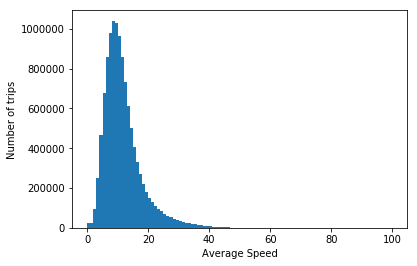

In [21]:
fig, ax = plt.subplots()
ax.hist(trips['avg_speed'], 100)
ax.set_xlabel('Average Speed')
ax.set_ylabel('Number of trips')
plt.show()

In [22]:
trips['avg_speed'].mean()

11.664764005566933

In [ ]:
# LGA coordinate
lga_long = -73.8702298524
lga_lat = 40.7730135746
lga_long_rad = lga_long*np.pi/180
lga_lat_rad = lga_lat*np.pi/180

In [23]:
# Function to calculate distance between pickup point and LGA position
def distanceToLGA_PKU(df):
    long_rad = df['pickup_longitude']*np.pi/180
    lat_rad = df['pickup_latitude']*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((lat_rad-lga_lat_rad)/2)*np.sin((lat_rad-lga_lat_rad)/2)+np.cos(lat_rad)*np.cos(lga_lat_rad)*np.sin((long_rad-lga_long_rad)/2)*np.sin((long_rad-lga_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return df.assign(pku_LGA=dmile)

In [24]:
# Function to calculate distance between dropoff point and LGA position
def distanceToLGA_DPO(df):
    long_rad = df['dropoff_longitude']*np.pi/180
    lat_rad = df['dropoff_latitude']*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((lat_rad-lga_lat_rad)/2)*np.sin((lat_rad-lga_lat_rad)/2)+np.cos(lat_rad)*np.cos(lga_lat_rad)*np.sin((long_rad-lga_long_rad)/2)*np.sin((long_rad-lga_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return df.assign(dpo_LGA=dmile)

In [26]:
lga_long = -73.8702298524
lga_lat = 40.7730135746

In [28]:
lga_long_rad = lga_long*np.pi/180
lga_lat_rad = lga_lat*np.pi/180

In [29]:
# New column: distance from pickup point to LGA
trips = trips.pipe(distanceToLGA_PKU)

In [30]:
# New column: distance from drop off point to LGA
trips = trips.pipe(distanceToLGA_DPO)

In [31]:
trips

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,distance_ratio,pku_time,dpo_time,avg_speed,pku_LGA,dpo_LGA
0,3.60,-73.985901,40.768040,-73.983986,40.730099,2.619841,1.374129,2016-05-01 00:00:00,2016-05-01 00:17:31,12.331113,6.054222,6.642630
1,1.68,-73.991577,40.744751,-73.975700,40.765469,1.652925,1.016380,2016-05-01 00:00:00,2016-05-01 00:07:31,13.410200,6.635259,5.536090
2,1.09,-73.993073,40.741573,-73.980995,40.744633,0.665727,1.637308,2016-05-01 00:00:00,2016-05-01 00:07:01,9.320665,6.777118,6.111396
3,4.21,-73.991943,40.684601,-74.002258,40.733002,3.382959,1.244473,2016-05-01 00:00:00,2016-05-01 00:19:47,12.768324,8.815854,7.432830
4,0.56,-74.005280,40.740192,-73.997498,40.737564,0.445437,1.257191,2016-05-01 00:00:00,2016-05-01 00:06:39,5.052632,7.413009,7.087465
5,0.63,-73.979294,40.755764,-73.988014,40.758469,0.492509,1.279164,2016-05-01 00:00:00,2016-05-01 00:05:19,7.109718,5.822700,6.236644
6,6.68,-73.981544,40.780739,-73.937805,40.855343,5.631629,1.186158,2016-05-01 00:00:00,2016-05-01 00:15:43,25.501591,5.840659,6.687571
7,1.48,-73.987198,40.750507,-73.980797,40.767826,1.240939,1.192645,2016-05-01 00:00:00,2016-05-01 00:06:31,13.626598,6.307234,5.788855
11,5.20,-73.951302,40.774345,-74.002312,40.739685,3.581587,1.451870,2016-05-01 00:00:01,2016-05-01 00:15:50,19.726027,4.237267,7.276473
12,4.75,-73.983498,40.726082,-74.014130,40.712830,1.844539,2.575170,2016-05-01 00:00:01,2016-05-01 00:13:28,21.189591,6.748484,8.592804


In [32]:
# Trips from LGA: pickup point within 1 mile range from LGA, and dropoff point outside 1 mile range of LGA
# Pickup time in range [May 17 2016 00:00, May 18 2016 00:00)
trips_fromLGA = trips.loc[(trips['pku_LGA'] <= 1.0) & (trips['dpo_LGA'] > 1.0) & (trips['pku_time'] >= datetime(2016,5,17,0,0,0)) & (trips['pku_time'] < datetime(2016,5,18,0,0,0)), :]

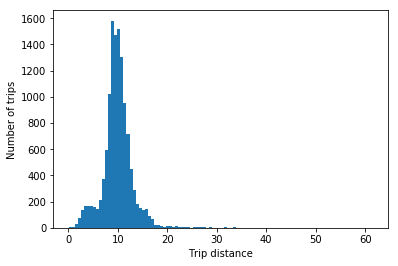

In [33]:
fig, ax = plt.subplots()
ax.hist(trips_fromLGA['trip_distance'], 100)
ax.set_xlabel('Trip distance')
ax.set_ylabel('Number of trips')
plt.show()

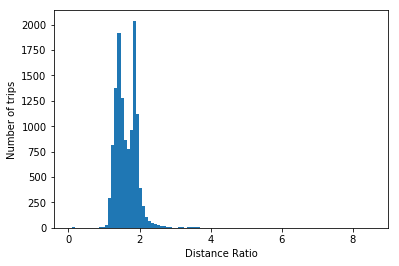

In [34]:
fig, ax = plt.subplots()
ax.hist(trips_fromLGA['distance_ratio'], 100)
ax.set_xlabel('Distance Ratio')
ax.set_ylabel('Number of trips')
plt.show()

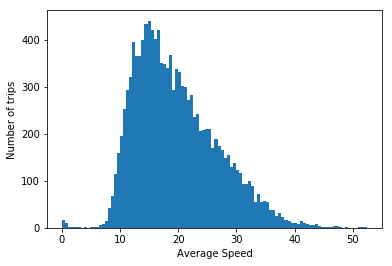

In [35]:
fig, ax = plt.subplots()
ax.hist(trips_fromLGA['avg_speed'], 100)
ax.set_xlabel('Average Speed')
ax.set_ylabel('Number of trips')
plt.show()

In [36]:
trips_fromLGA['avg_speed'].mean()

19.649074932900294

In [37]:
# Mean value of distance ratio of all trips from LGA on May 17 2016
trips_fromLGA['distance_ratio'].mean()

1.6389485777442727

In [38]:
trips_fromLGA

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,distance_ratio,pku_time,dpo_time,avg_speed,pku_LGA,dpo_LGA
6347517,9.10,-73.872978,40.774151,-73.994797,40.755314,6.497610,1.400515,2016-05-17 00:04:33,2016-05-17 00:25:26,26.145251,0.163652,6.623537
6347532,8.20,-73.870872,40.773727,-73.972298,40.748962,5.569410,1.472328,2016-05-17 00:04:37,2016-05-17 00:19:59,32.017354,0.059613,5.586584
6347533,9.00,-73.862816,40.769054,-73.973984,40.750595,5.948079,1.513093,2016-05-17 00:04:37,2016-05-17 00:24:36,27.022519,0.474051,5.638784
6347542,4.82,-73.863701,40.770321,-73.858841,40.738590,2.204102,2.186832,2016-05-17 00:04:40,2016-05-17 00:18:10,21.422222,0.388482,2.448667
6347543,8.30,-73.872993,40.774200,-73.931900,40.695080,6.268160,1.324152,2016-05-17 00:04:40,2016-05-17 00:23:58,25.803109,0.166013,6.270046
6347547,9.71,-73.863503,40.769821,-73.951538,40.689812,7.187973,1.350868,2016-05-17 00:04:41,2016-05-17 00:25:44,27.676960,0.414851,7.143673
6347671,5.62,-73.863327,40.770000,-73.848259,40.724918,3.208840,1.751412,2016-05-17 00:04:54,2016-05-17 00:18:06,25.545455,0.416335,3.511682
6347736,11.30,-73.862511,40.768955,-73.947144,40.672394,7.998780,1.412716,2016-05-17 00:05:00,2016-05-17 00:30:30,26.588235,0.491041,8.023659
6347741,6.29,-73.862762,40.768990,-73.847099,40.716671,3.701682,1.699227,2016-05-17 00:05:01,2016-05-17 00:19:19,26.391608,0.478915,4.071343
6347835,9.01,-73.863747,40.769920,-73.957031,40.778553,4.910653,1.834786,2016-05-17 00:05:05,2016-05-17 00:25:56,25.928058,0.400407,4.551598


In [39]:
# Create new graph
G = nx.Graph()

In [77]:
# start time of May 17, 2016
startTime = datetime(2016,5,17,0,0,0)
# pool window: 5minute
delta = timedelta(minutes=5)
# array to store % miles saved for each pool
milesaves = []
# array to store % trips saved for each pool
tripsaves = []
# array to store average computing time for each pool
computetimes = []
# get time when start running
start = datetime.now()
for k in range(0, 288):
#     get current time
    current = datetime.now()
#     if pass 5 minutes, exit for loop
    if ((current-start)/timedelta(seconds=1)>300):
        break
#   get pool for 5 minute window
    pool = trips_fromLGA.loc[(trips_fromLGA['pku_time'] >= startTime + k*delta) & (trips_fromLGA['pku_time'] < startTime + (k+1)*delta),:]
#   if there are trips in pool
    if (len(pool) > 0):
#       Clear graph
        G.clear()
#       Add nodes to graph
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
#               Calculate Euclidean distance between 2 dropoff points of 2 trips
#               Then multiplied by mean value of distance ratio
                d = distanceTwoDPO(pool.iloc[i], pool.iloc[j])*1.6389485777
#               Check if miles can be saved
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
#                   Calculate traveling time from Hub to A
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
#                   Calculate traveling time from Hub to B
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
#                   Calculate delay tolerance of trip HA
                    delayA = tHA * 0.2
#                   Calculate delay tolerance of trip HB
                    delayB = tHB * 0.2
#                   Calculate average speed of 2 trips
                    avgSpeed = (pool.iloc[i].avg_speed + pool.iloc[j].avg_speed)/2.0
#                   Calculate time to travel from A to B, or from B to A
                    tAB = d * 3600 / avgSpeed
#                   If 2 trips are sharable, add edge to graph
                    if (tHA + tAB <= tHB + delayB) or (tHB + tAB <= tHA + delayA):
                        saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                        G.add_edge(i, j, weight=saved)
#       Call the maximum matching on the graph
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
#       Calculate the total miles saved of each pool
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
#       Add result to arrays
        milesaves.append(saving/pool['trip_distance'].sum())
        tripsaves.append(len(matching)/len(pool))
        computetimes.append((endtime-starttime)/timedelta(seconds=1))

In [ ]:
# The number of pools get processed in 5 minutes:
len(milesaves)

In [82]:
# Average percent of trips saved per pool
valid = []
for trip in tripsaves:
    if trip > 0:
        valid.append(trip)
np.average(valid)*100

47.19041309272805

In [43]:
np.average(tripsaves)*100

42.91803001437406

In [78]:
np.average(computetimes)

3.984996802469135

In [45]:
startTime = datetime(2016,5,17,0,0,0)
delta = timedelta(minutes=10)
milesaves10 = []
tripsaves10 = []
computetimes10 = []
for k in range(0, 144):
    pool = trips_fromLGA.loc[(trips_fromLGA['pku_time'] >= startTime + k*delta) & (trips_fromLGA['pku_time'] < startTime + (k+1)*delta),:]
    if (len(pool) > 0):
        G.clear()
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
                d = distanceTwoDPO(pool.iloc[i], pool.iloc[j])*1.6389485777
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                    delayA = tHA * 0.2
                    delayB = tHB * 0.2
                    avgSpeed = (pool.iloc[i].avg_speed + pool.iloc[j].avg_speed)/2.0
                    tAB = d * 3600 / avgSpeed
                    if (tHA + tAB <= tHB + delayB) or (tHB + tAB <= tHA + delayA):
                        saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                        G.add_edge(i, j, weight=saved)
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
        milesaves10.append(saving/pool['trip_distance'].sum())
        tripsaves10.append(len(matching)/len(pool))
        computetimes10.append((endtime-starttime)/timedelta(seconds=1))

In [86]:
valid = []
for mile in tripsaves10:
    if mile > 0:
        valid.append(mile)
np.average(valid)*100

48.07439758471702

In [47]:
np.average(tripsaves10)*100

42.77485769348836

In [48]:
np.average(computetimes10)

16.108554244094492

In [57]:
len(tripsaves10)

127

In [55]:
valid = []
for mile in tripsaves10:
    if mile > 0:
        valid.append(mile)
np.average(valid)*100

48.07439758471702

In [58]:
trips_toLGA = trips.loc[(trips['pku_LGA'] > 1.0) & (trips['dpo_LGA'] <= 1.0) & (trips['dpo_time'] >= datetime(2016,5,17,0,0,0)) & (trips['dpo_time'] < datetime(2016,5,18,0,0,0)), :]

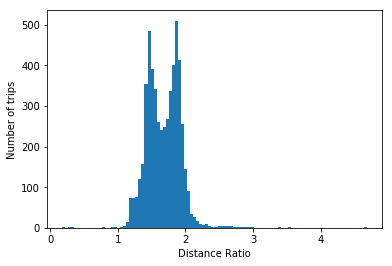

In [59]:
fig, ax = plt.subplots()
ax.hist(trips_toLGA['distance_ratio'], 100)
ax.set_xlabel('Distance Ratio')
ax.set_ylabel('Number of trips')
plt.show()

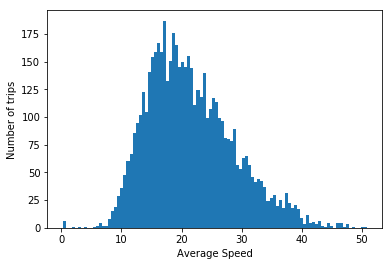

In [60]:
fig, ax = plt.subplots()
ax.hist(trips_toLGA['avg_speed'], 100)
ax.set_xlabel('Average Speed')
ax.set_ylabel('Number of trips')
plt.show()

In [61]:
trips_toLGA['distance_ratio'].mean()

1.679833796569822

In [62]:
def distanceTwoPKU(trip1, trip2):
    pku_long_rad = trip1.pickup_longitude*np.pi/180
    pku_lat_rad = trip1.pickup_latitude*np.pi/180
    dpo_long_rad = trip2.pickup_longitude*np.pi/180
    dpo_lat_rad = trip2.pickup_latitude*np.pi/180
    drad = 2*np.arcsin(np.sqrt(np.sin((pku_lat_rad-dpo_lat_rad)/2)*np.sin((pku_lat_rad-dpo_lat_rad)/2)+np.cos(pku_lat_rad)*np.cos(dpo_lat_rad)*np.sin((pku_long_rad-dpo_long_rad)/2)*np.sin((pku_long_rad-dpo_long_rad)/2)))
    dmile = drad*180*60*1.15/np.pi
    return dmile

In [63]:
startTime = datetime(2016,5,17,0,0,0)
delta = timedelta(minutes=5)
milesaves_LGA = []
tripsaves_LGA = []
computetimes_LGA = []
# get time when start running
start = datetime.now()
for k in range(0, 288):
#   get current time
    current = datetime.now()
#   if pass 5 minutes, exit for loop
    if ((current-start)/timedelta(seconds=1)>300):
        break
    pool = trips_toLGA.loc[(trips_toLGA['dpo_time'] >= startTime + k*delta) & (trips_toLGA['dpo_time'] < startTime + (k+1)*delta),:]
    if (len(pool) > 0):
        G.clear()
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
                d = distanceTwoPKU(pool.iloc[i], pool.iloc[j])*1.679833796569822
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                    delayA = tHA * 0.2
                    delayB = tHB * 0.2
                    avgSpeed = (pool.iloc[i].avg_speed + pool.iloc[j].avg_speed)/2.0
                    tAB = d * 3600 / avgSpeed
                    if (pool.iloc[i].pku_time <= pool.iloc[j].pku_time):
                        delta_PKU = (pool.iloc[j].pku_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                        if (tAB <= delta_PKU + delayB) and (tAB + tHB <= tHA + delayA):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
                    else:
                        delta_PKU = (pool.iloc[i].pku_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                        if (tAB <= delta_PKU + delayA) and (tAB + tHA <= tHB + delayB):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
        milesaves_LGA.append(saving/pool['trip_distance'].sum())
        tripsaves_LGA.append(len(matching)/len(pool))
        computetimes_LGA.append((endtime-starttime)/timedelta(seconds=1))

In [ ]:
# Number of pools processed in 5 minutes:
len(milesaves_LGA)

In [95]:
# Average percent of trips saved per pool
valid = []
for trip in tripsaves_LGA:
    if trip > 0:
        valid.append(trip)
np.average(valid)*100

46.59579377943606

In [67]:
startTime = datetime(2016,5,17,0,0,0)
delta = timedelta(minutes=10)
milesaves_LGA10 = []
tripsaves_LGA10 = []
computetimes_LGA10 = []
for k in range(0, 144):
    pool = trips_toLGA.loc[(trips_toLGA['dpo_time'] >= startTime + k*delta) & (trips_toLGA['dpo_time'] < startTime + (k+1)*delta),:]
    if (len(pool) > 0):
        G.clear()
        for n in range(len(pool)):
            G.add_node(n)
        saving = 0.0
        starttime = datetime.now()
        for i in range(len(pool) - 1):
            for j in range(i+1, len(pool)):
                d = distanceTwoPKU(pool.iloc[i], pool.iloc[j])*1.679833796569822
                if (d < pool.iloc[i].trip_distance) or (d < pool.iloc[j].trip_distance):
                    tHA = (pool.iloc[i].dpo_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                    tHB = (pool.iloc[j].dpo_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                    delayA = tHA * 0.2
                    delayB = tHB * 0.2
                    avgSpeed = (pool.iloc[i].avg_speed + pool.iloc[j].avg_speed)/2.0
                    tAB = d * 3600 / avgSpeed
                    if (pool.iloc[i].pku_time <= pool.iloc[j].pku_time):
                        delta_PKU = (pool.iloc[j].pku_time - pool.iloc[i].pku_time)/timedelta(seconds=1)
                        if (tAB <= delta_PKU + delayB) and (tAB + tHB <= tHA + delayA):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
                    else:
                        delta_PKU = (pool.iloc[i].pku_time - pool.iloc[j].pku_time)/timedelta(seconds=1)
                        if (tAB <= delta_PKU + delayA) and (tAB + tHA <= tHB + delayB):
                            saved = pool.iloc[i].trip_distance + pool.iloc[j].trip_distance - d
                            G.add_edge(i, j, weight=saved)
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight='weight')
        endtime = datetime.now()
        for m in matching:
            saving = saving + G.edges[m[0], m[1]]['weight']
        milesaves_LGA10.append(saving/pool['trip_distance'].sum())
        tripsaves_LGA10.append(len(matching)/len(pool))
        computetimes_LGA10.append((endtime-starttime)/timedelta(seconds=1))

In [93]:
valid = []
for mile in tripsaves_LGA10:
    if mile > 0:
        valid.append(mile)
np.average(computetimes_LGA10)

4.543357167883212

In [79]:
len(trips_fromLGA)

12480

In [80]:
len(trips_toLGA)

5421